In [17]:
for data_batch, labels_batch in val_set:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(64, 224, 224, 3)
(64, 141)


In [18]:
# Replace this with the actual path where you saved the weights file
vgg19_weights_path = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the pre-trained VGG19 model without the top classification layer
vgg19 = VGG19(input_shape=[224, 224, 3], weights=vgg19_weights_path, include_top=False)

# Add custom layers on top of VGG19
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(train_set.num_classes, activation="softmax"))

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=8,
    verbose=1,
    
    #validation_steps=len(val_set)
)

Epoch 1/8


2024-10-11 14:43:01.078733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

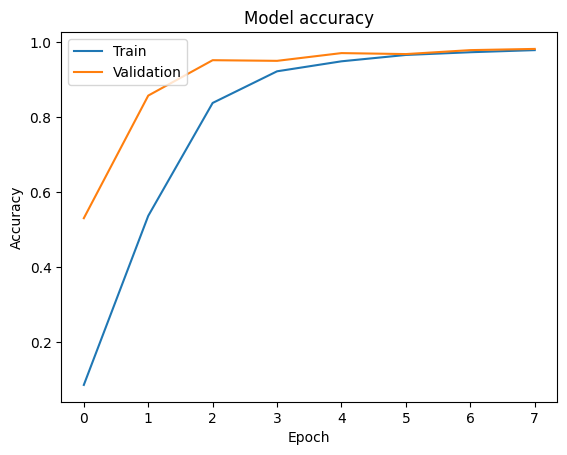

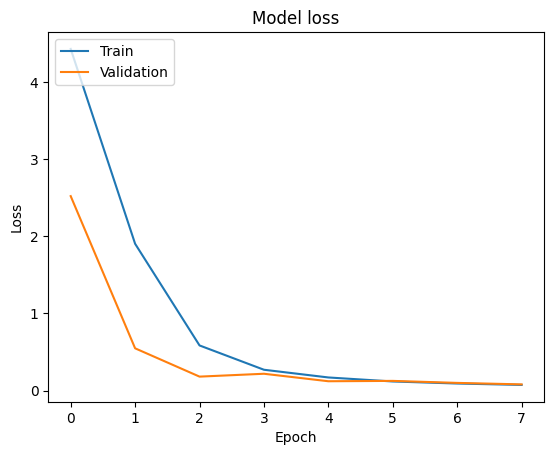

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
test_set = val_datagen.flow_from_directory('fruits-360/Test',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Found 23619 images belonging to 141 classes.
739/739 ━━━━━━━━━━━━━━━━━━━━ 206s 278ms/step - accuracy: 0.9818 - loss: 0.0775
Test Accuracy: 98.15%


In [20]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence